# 3.2 Solving for a double pendulum
owo

In [78]:
import numpy as np
import matplotlib.pyplot as plt

### Unterpunkt Zero: RK4 herkopieren
weil Importieren aus notebooks is a krampf

In [79]:
#Funktion für das explizite Runge-Kutta-Verfahren 
def rk_explicit(F, y0, t, e, A, b, c):
    """
    exp. Runge–Kutta für y' =F(y, t).
    y0: 1D array
    t:  1D array der Zeit mt Schritten e (epsilon xD)
    A,b,c: Butcher coeff
    """
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    c = np.array(c, dtype=float)

    s = len(b) 
    y0 = np.array(y0, dtype=float)
    dim = len(y0)

    Y = np.zeros((len(t), dim))
    Y[0] = y0

    for n in range(len(t) - 1):
        yn = Y[n]
        tn = t[n]

        K = np.zeros((s, dim))  # stage derivatives

        for i in range(s):
            y_stage = yn.copy()
            for j in range(i):  # explizit nur j < i
                y_stage += e * A[i, j] * K[j]

            K[i] = F(y_stage, tn + c[i] * e)

        Y[n + 1] = yn.copy()
        for i in range(s):
            Y[n + 1] += e * b[i] * K[i]

    return Y

#Butcher Tableus
#zerst Euler
A_eu = [[0.0]]
b_eu = [1.0]
c_eu = [0.0]

#Runge Kutta Odg 4
A_rk4 = [
    [0.0, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.0, 0.0],
    [0.0, 0.5, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
]
b_rk4 = [1/6, 1/3, 1/3, 1/6]
c_rk4 = [0.0, 0.5, 0.5, 1.0]

### Unterpunkt a: Implement the Functions and solve with RK4

In [80]:
w_sq = 9.81  # omega^2 = g/l, und l=1

def F_duop(angabe, t):
    th1, th2, p1, p2 = angabe
    th = th1 - th2
    sin, cos = np.sin(th), np.cos(th)

    th1_dot= (p1 - p2*cos) /(1 + sin**2)
    th2_dot = (2*p2 - p1*cos) / (1 + sin**2)

    A = (p1*p2*sin) /(1 + sin**2)
    B =((p1**2 + 2*p2**2 - 2*p1*p2*cos) / ((1 + sin**2)**2)) * sin*cos

    p1_dot =-A + B - 2*w_sq*np.sin(th1)
    p2_dot =A - B -1*w_sq*np.sin(th2)

    return np.array([th1_dot, th2_dot, p1_dot, p2_dot], dtype=float)

# Zeit udn Schrittweite
e = 0.001
t = np.arange(0, 10+e, e)
#Anfangswerte aus angabe
y0_1 =[0.0, 0.0, 4.0, 2.0]
y0_2= [0.0, 0.0, 0.0, 4.0]

Y_1 = rk_explicit(F_duop, y0_1, t, e, A_rk4, b_rk4, c_rk4)
Y_2 = rk_explicit(F_duop, y0_2, t, e, A_rk4, b_rk4, c_rk4)


### Unterpunkt b: Pointcaré oder soos

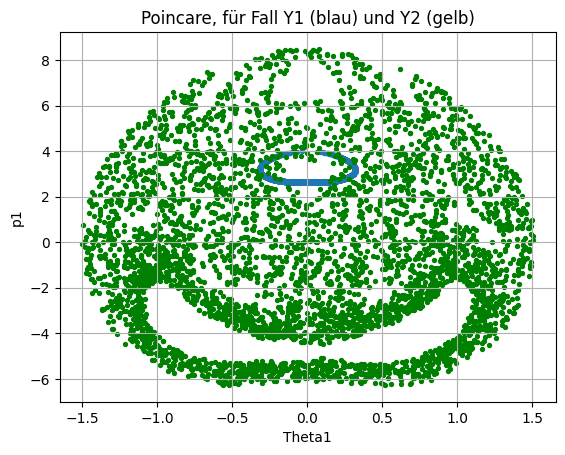

Gelb ist anscheinend Chaotisch, und blau is ned


In [81]:
t2= np.arange(0, 10000+e, e)
def pointpoints(Y, t):
    th1, th2, p1, p2 = Y[:,0], Y[:,1], Y[:,2], Y[:,3]

    i = np.where((th2[:-1] < 0) & (th2[1:] >= 0) & (p2[1:] > 0))[0]  # crossing indices

    a = (-th2[i]) / (th2[i+1] - th2[i])          # interpolation factor for th2=0
    th1c = th1[i] + a*(th1[i+1] - th1[i])
    p1c  = p1[i]  + a*(p1[i+1]  - p1[i])

    return th1c, p1c

y0_nc =[0.0, 0.0, 4.0, 2.0]
y0_yc= [1.0, -1.0, 0.0, 3.0]

Y_nc = rk_explicit(F_duop, y0_nc, t2, e, A_rk4, b_rk4, c_rk4)
Y_yc = rk_explicit(F_duop, y0_yc, t2, e, A_rk4, b_rk4, c_rk4)

th1p, p1p = pointpoints(Y_nc, t2)
th2p, p2p = pointpoints(Y_yc, t2)


plt.figure()
plt.title("Poincare, für Fall Y1 (blau) und Y2 (gelb)")
plt.scatter(th1p, p1p, s=8)
plt.scatter(th2p, p2p, s=8, color="green")
plt.xlabel("Theta1")
plt.ylabel("p1")
plt.grid(True)
plt.show()
print("Gelb ist anscheinend Chaotisch, und blau is ned")

### Unterpunkt c: Energy Plots